In [0]:
import pyspark.sql.functions as F
#from datetime import datetme as dt

#Just change all the values here based on the resource name you have created in your environemnt and workspace.

sqlDbName = 'harris5370project'
dbUserName = 'harrisadmin'
passwordKey = 'sqldbpasswordkey'
stgAccountSASTokenKey = 'sastokenstorage'
#landingFileName =fileName #'All_License_Holders'  #dbutils.widgets.get('All_License_Holders')
databricksScopeName ='harris5370project'
dbServer = 'harris5370project'
dbServerPortNumber ='1433'
storageContainer ='harris5370project'
storageAccount='harris5370project'
landingMountPoint ='/mnt'

In [0]:
#connect to Azure SQL DB
dbPassword = dbutils.secrets.get(scope = databricksScopeName, key= passwordKey)
serverurl = 'jdbc:sqlserver://{}.database.windows.net:{};database={};user={};'.format(dbServer, dbServerPortNumber,sqlDbName,dbUserName)
connectionProperties = {
    'password':dbPassword,
    'driver':'com.microsoft.sqlserver.jdbc.SQLServerDriver'
}


In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("License Holders Clustering") \
    .getOrCreate()


In [0]:
df = spark.read.jdbc(url=serverurl, table='MEDICAL.RECORDS', properties=connectionProperties)
display(df)

LicenseNumber LicenseType Status FirstName MiddleName LastName BusinessName Address1 Address2 City State Zip LicenseFirstIssuanceDate LicenseEffectiveDate LicenseExpiration Specialty Actions 042-0000989 MD INACTIVE PER REQUEST JOHN M BACHULUS null PO BOX 10662, null FULLERTON CA 92838 1924-07-21 1998-11-30 1998-11-30 Critical Care Medicine None 060-0003672 MD LAPSED Gustavo null Carbone FAHC- Dept of Rheumatology 111 Colchester Avenue, WP 2-272 null BURLINGTON VT 05401-0000 2008-07-02 2009-04-20 2010-06-30 Internal Medicine None 042-0000989 MD INACTIVE PER REQUEST JOHN M BACHULUS null PO BOX 10662, null FULLERTON CA 92838 1924-07-21 1998-11-30 1998-11-30 Internal Medicine None 060-0003673 MD LAPSED Julia null Chen DHMC - Dept. of Internal Medicine One Medical Center Drive null LEBANON NH 03756-0000 2008-07-02 2010-06-09 2011-06-30 null None 060-0003674 MD LAPSED Chantal null Roy- Hewitson FAHC - Dept of Internal Medicine 111 Colchester Avenue, WP 2-272 null BURLINGTON VT 05401-0000 2008-07-02 2012-07-01 2013-06-30 null None 060-0003675 MD LAPSED Aaron Leonard Klein FAHC- Dept of Pathology 111 Colchester Avenue, WP 2-272 null BURLINGTON VT 05401-0000 2008-07-02 2012-07-01 2013-06-30 null None 060-0003676 MD LAPSED Stefan null Lischke CVMC - Cardiology 130 Fisher Road, MOB A, Suite 2-1 null Berlin VT 05602-0000 2008-07-02 2013-07-01 2014-06-30 Internal Medicine None 060-0003677 MD LAPSED Joanna Ellen Schwartz DHMC- Dept of Internal Medicine One Medical Center Drive null LEBANON NH 03756-0000 2008-07-02 2010-06-09 2011-06-30 null None 060-0003678 MD LAPSED Ryan Robert Walsh UVM- Dept of Radiology 111 Colchester Avenue, WP 2-272 null BURLINGTON VT 05401-0000 2008-07-02 2011-06-15 2012-06-30 Radiology None 060-0003679 MD LAPSED Ghassan Jerjous Ibrahim FAHC Dept of Pathology 111 Colchester Avenue WP 2-272 null BURLINGTON VT 05401-0000 2008-07-16 2008-07-16 2009-06-30 null None 060-0003680 MD LAPSED Shalini null Jha FAHC Dept of Internal Medicine 111 Colchester Avenue WP 272 null BURLINGTON VT 05401-0000 2008-07-16 2010-07-01 2011-06-30 null None 060-0003681 MD LAPSED Joel Elliott Lightner JR FAHC Dept of Radiology 111 Colchester Avenue WP 2-272 null BURLINGTON VT 05401-0000 2008-07-16 2012-07-01 2013-06-30 Radiology None 060-0003682 MD LAPSED Prema Ramachandran Menon null 89 Beaumont Avenue,Given Bldg D208 null BURLINGTON VT 05405-0000 2008-07-16 2010-07-01 2011-06-30 Internal Medicine None 060-0003683 MD LAPSED Joan null Newell DHMC Dept of Internal Medicine One Medical Center Drive null LEBANON NH 03756-0000 2008-07-16 2010-06-09 2011-06-30 null None 060-0003684 MD LAPSED Frederick null Rydz FAHC Dept of Internal Medicine 111 Colchester Avenue WP 2-272 null BURLINGTON VT 05401-0000 2008-07-16 2010-07-01 2011-06-30 Internal Medicine None 060-0003685 MD LAPSED Srinivasan null Subramanian FAHC Dept of Gastroenterology 111 Colchester Avenue WP 2-272 null BURLINGTON VT 05401-0000 2008-07-16 2010-07-01 2011-06-30 Internal Medicine None 060-0003686 MD LAPSED Shagun null Saggar Center For Community Care 5 Alice Peck Day Drive null LEBANON NH 03766-0000 2008-08-06 2008-08-06 2009-06-30 Family Medicine None 060-0003687 MD LAPSED Jacob David Beniflah DHMC Pediatrics One Medical Center Drive null LEBANON NH 03756-0000 2008-10-15 2009-06-16 2010-06-30 Pediatrics None 060-0003688 MD LAPSED Cameron Wick Donaldson FAHC Dept of Cardiology 111 Colchester Avenue WP 2-272 null BURLINGTON VT 05401-0000 2008-11-05 2012-07-01 2013-06-30 Internal Medicine None 060-0003689 MD LAPSED Megan Harris Batchelder North Country Primary Care 186 Prouty Drive null NEWPORT VT 05855-0000 2008-11-05 2010-06-09 2011-06-30 null None 042-0000989 MD INACTIVE PER REQUEST JOHN M BACHULUS null PO BOX 10662, null FULLERTON CA 92838 1924-07-21 1998-11-30 1998-11-30 Nephrology None 060-0003690 MD LAPSED Brian C Leung Central Vermont Hospital 130 Fisher Road PO Box 547 null BARRE VT 05641-0000 2008-11-05 2008-11-05 2009-06-30 Orthopaedic Surgery None 042-0000991 MD INACTIVE PER 

In [0]:
df1 = df.fillna('Unknown', subset=['City', 'State'])


In [0]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCols=["City", "State", "Status"], outputCols=["City_Indexed", "State_Indexed", "Status_Indexed"])
df_indexed = indexer.fit(df1).transform(df1)


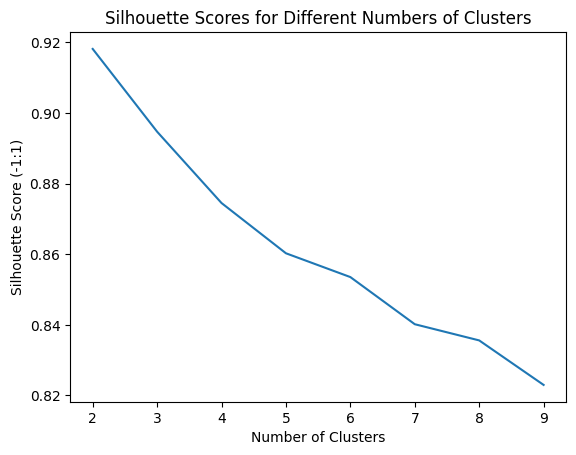

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator

# Assemble features
assembler = VectorAssembler(inputCols=["City_Indexed", "State_Indexed", "Status_Indexed"], outputCol="features")
df_features = assembler.transform(df_indexed)

# Initialize the evaluator
evaluator = ClusteringEvaluator(predictionCol="prediction", featuresCol="features", metricName="silhouette")

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_features)
    predictions = model.transform(df_features)
    
    # Evaluate clustering by computing Silhouette score
    silhouette = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette)

# Plotting the silhouette scores
import matplotlib.pyplot as plt
plt.plot(range(2, 10), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score (-1:1)')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

